### Fourier Series Approximation and the Gibbs Phenomenon

https://www.youtube.com/watch?v=sSvj1nCC6_o&list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC

This notebook demonstrates how a **square pulse** can be approximated by a truncated **Fourier series**.

---

#### 1. Definition of the Fourier Series

For a periodic function $f(x)$ with period $L$, the Fourier series expansion is:

$$
f(x) \;\approx\; \frac{A_0}{2} 
+ \sum_{k=1}^{r} \Bigg[ A_k \cos\!\left(\tfrac{2\pi k}{L}x\right) 
+ B_k \sin\!\left(\tfrac{2\pi k}{L}x\right) \Bigg]
$$

where the coefficients are defined by:

$$
A_0 = \frac{2}{L} \int_0^L f(x)\,dx
$$

$$
A_k = \frac{2}{L} \int_0^L f(x)\cos\!\left(\tfrac{2\pi k}{L}x\right) dx,
\quad
B_k = \frac{2}{L} \int_0^L f(x)\sin\!\left(\tfrac{2\pi k}{L}x\right) dx
$$

---

#### 2. Implementation in Code

- **Domain setup:**  
  The domain spans $0 \leq x \leq 2\pi$ with spacing $\Delta x = 0.01$.  
  A square pulse is defined such that $f(x) = 1$ for the middle half of the interval, and $f(x) = 0$ elsewhere.  

- **Numerical approximation:**  
  The integrals above are approximated with discrete sums over the sampled domain.

- **Series reconstruction:**  
  The Fourier approximation is built by summing harmonics up to $r = 100$.

---

#### 3. Gibbs Phenomenon

When approximating a discontinuous function (like the square pulse), the Fourier series exhibits **overshoot and oscillations near the discontinuities**.  

- The overshoot does **not disappear** as $r \to \infty$.  
- Instead, it approaches a limiting value of about **9% of the jump amplitude**.  
- As more terms are added, the oscillations become confined to narrower regions around the discontinuities.  

This effect is known as the **Gibbs Phenomenon** and is fundamental to Fourier analysis of discontinuous signals.

---


r: 100


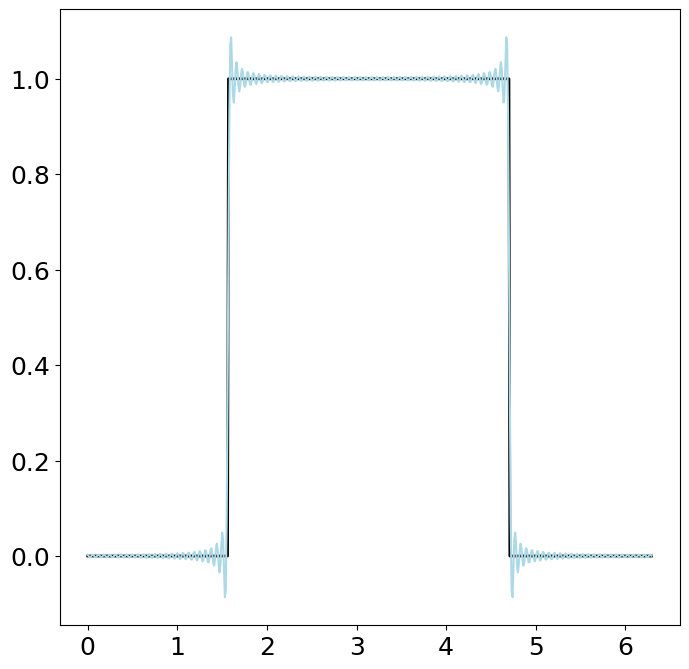

In [68]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

# Define domain
dx = 0.01 
L = 2 * np.pi
x = np.arange(0, L + dx, dx) # domain is -pi to pi, with dx = 0.001
n = len(x)
nquart = int(np.floor(n/4))  # quarter of the length of the array

f = np.zeros_like(x)
f[nquart:3*nquart] = 1  # square pulse

A0 = np.sum(f * np.ones_like(x)) * dx * 2 / L # Compute DC term
fFS = A0 / 2 * np.ones_like(f)  # start with DC term

r = 100
# r = int(L/(2*dx)) - 1 # for almost perfect approximation, choose r below Nyquist

print(f"r: {r}")

for k in range(1, r + 1):
    Ak = np.sum(f * np.cos(2 * np.pi * k * x / L)) * dx * 2 / L
    Bk = np.sum(f * np.sin(2 * np.pi * k * x / L)) * dx * 2 / L
    fFS = fFS + Ak * np.cos(2 * np.pi * k * x / L) + Bk * np.sin(2 * np.pi * k * x / L)

plt.figure()
plt.plot(x, f, color='k', label='Original function', linewidth=2)
plt.plot(x, fFS, color='#add8e6ff', label='Fourier series approximation', linewidth=1.5)
plt.show()